In [44]:
#Mengimport Library

import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# **MEMASUKKAN DATASET** 

In [45]:
#Membaca Dataset

df = pd.read_csv('dataset_diabetes.csv')

In [46]:
#Menampilkan Data

df.head()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur,Hasil
0,8,188,78,0,0,47.9,0.137,43,1
1,7,152,88,44,0,50.0,0.337,36,1
2,2,99,52,15,94,24.6,0.637,21,0
3,1,109,56,21,135,25.2,0.833,23,0
4,2,88,74,19,53,29.0,0.229,22,0


# **INFORMASI DARI DATASET**

In [47]:
#menampilkan Informasi dari data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Kehamilan   768 non-null    int64  
 1   Glukosa     768 non-null    int64  
 2   Darah       768 non-null    int64  
 3   LemakTubuh  768 non-null    int64  
 4   Insulin     768 non-null    int64  
 5   BMI         768 non-null    float64
 6   Riwayat     768 non-null    float64
 7   Umur        768 non-null    int64  
 8   Hasil       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
#Jumlah Nilai hasil positif dan negatif pada data


df.Hasil.value_counts()

0    500
1    268
Name: Hasil, dtype: int64

<AxesSubplot:xlabel='Hasil', ylabel='count'>

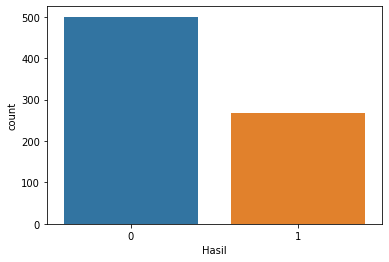

In [49]:
# visualisasi nilai hasil data 

sns.countplot(data=df, x='Hasil')

In [53]:
#isi kolom pada data

df.columns

Index(['Kehamilan', 'Glukosa', 'Darah', 'LemakTubuh', 'Insulin', 'BMI',
       'Riwayat', 'Umur', 'Hasil'],
      dtype='object')

# **MELIHAT NILAI YANG HILANG**

In [54]:
#mengecek apakah ada data yg kosong atau hilang data

df.isnull().any().sum()

0

# **MENGGANTI NILAI YANG 0 MENJADI NILAI RATA-RATA**

In [55]:
#menampilkan tabel max dan min pada data

df.describe()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur,Hasil
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
#mengubah nilai yang kosong menjadi nilai rata rata data 

col=('Glukosa', 'Darah', 'LemakTubuh','Insulin', 'BMI')

for i in col:
    df[i].replace(0,df[i].mean(),inplace=True)

In [57]:
df.describe()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur,Hasil
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [58]:
df.head()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur,Hasil
0,8,188.0,78.0,20.536458,79.799479,47.9,0.137,43,1
1,7,152.0,88.0,44.000000,79.799479,50.0,0.337,36,1
2,2,99.0,52.0,15.000000,94.000000,24.6,0.637,21,0
3,1,109.0,56.0,21.000000,135.000000,25.2,0.833,23,0
4,2,88.0,74.0,19.000000,53.000000,29.0,0.229,22,0


# **PEMBAGIAN DATASET MENJADI DATA X DAN Y**

In [59]:
#Pembagian data X dan Y pada data

X = df.drop('Hasil', axis=1)
y = df['Hasil']

In [60]:
#Menampilkan X

X.head()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur
0,8,188.0,78.0,20.536458,79.799479,47.9,0.137,43
1,7,152.0,88.0,44.000000,79.799479,50.0,0.337,36
2,2,99.0,52.0,15.000000,94.000000,24.6,0.637,21
3,1,109.0,56.0,21.000000,135.000000,25.2,0.833,23
4,2,88.0,74.0,19.000000,53.000000,29.0,0.229,22


In [61]:
#Menampilkan y

y.head()

0    1
1    1
2    0
3    0
4    0
Name: Hasil, dtype: int64

# **NORMALISASI DATA**

In [62]:
#Normalisasi Data 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7
0,0.470588,0.929032,0.551020,0.147135,0.079086,0.607362,0.025192,0.366667
1,0.411765,0.696774,0.653061,0.402174,0.079086,0.650307,0.110589,0.250000
2,0.117647,0.354839,0.285714,0.086957,0.096154,0.130879,0.238685,0.000000
3,0.058824,0.419355,0.326531,0.152174,0.145433,0.143149,0.322374,0.033333
4,0.117647,0.283871,0.510204,0.130435,0.046875,0.220859,0.064475,0.016667


# **MEMBAGI DATA MENJADI DATA LATIH DAN DATA UJI**

In [76]:
#Bagi data mnjadi data uji dan data latih

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.1, random_state = 0)
print("Jumlah Data Latih        :", x_train.shape)
print("Jumlah Data Uji          :", x_test .shape)
print("Jumlah Hasil Data Latih  :", y_train.shape)
print("Jumlah Hasil Data Uji    :", y_test.shape)

Jumlah Data Latih        : (691, 8)
Jumlah Data Uji          : (77, 8)
Jumlah Hasil Data Latih  : (691,)
Jumlah Hasil Data Uji    : (77,)


# **MODELLING KNN**

In [80]:
#PEMBUATAN MODEL KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)  #input nilai k
knn.fit(x_train,y_train)

knn_acc = accuracy_score(y_test,knn.predict(x_test))

In [81]:
print("Hasil Akurasi Data Latih :"+str(accuracy_score(y_train,knn.predict(x_train))*100))
print("Hasil Akurasi Data Uji   :"+str(accuracy_score(y_test,knn.predict(x_test))*100))

Hasil Akurasi Data Latih :80.31837916063675
Hasil Akurasi Data Uji   :80.51948051948052


In [82]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

**EVALUASI DATA LATIH**

In [83]:
confusion_matrix(y_train, train_pred)  #confusion matrix Data Latih 

array([[405,  39],
       [ 97, 150]], dtype=int64)

In [68]:
print("Hasil F1 Score :",f1_score(y_train, train_pred) * 100, '%')
print("Hasil Akurasi  :",accuracy_score(y_train, knn.predict(x_train)) * 100, '%')


Hasil F1 Score : 68.80733944954129 %
Hasil Akurasi  : 80.31837916063675 %


 **EVALUASI DATA UJI**

In [69]:
confusion_matrix(y_test, test_pred)  #confusion matrix Data Uji

array([[51,  5],
       [10, 11]], dtype=int64)

In [70]:
print("Hasil F1 Score :",f1_score(y_test, test_pred) * 100, '%')
print("Hasil Akurasi  :",accuracy_score(y_test, knn.predict(x_test)) * 100, '%')


Hasil F1 Score : 59.45945945945946 %
Hasil Akurasi  : 80.51948051948052 %


# EVALUASI AKHIR

In [71]:
print("Hasil Akurasi  :",accuracy_score(y_test, knn.predict(x_test)) * 100, '%')

Hasil Akurasi  : 80.51948051948052 %


In [72]:
#Menampilkan Akurasi 

score = []
for n in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    knnscore = knn.score(x_test, y_test)
    sken = score.append(knnscore)
    print(n, knnscore)

1 0.6753246753246753
2 0.7532467532467533
3 0.7922077922077922
4 0.7662337662337663
5 0.7922077922077922
6 0.8051948051948052
7 0.7922077922077922
8 0.7922077922077922
9 0.7922077922077922
10 0.8051948051948052
11 0.8181818181818182
12 0.8441558441558441
13 0.8051948051948052
14 0.8441558441558441
15 0.8181818181818182
16 0.8311688311688312
17 0.8181818181818182
18 0.8181818181818182
19 0.8051948051948052
20 0.8311688311688312
21 0.8181818181818182
22 0.8311688311688312
23 0.8181818181818182
24 0.8181818181818182
25 0.8181818181818182
26 0.8181818181818182
27 0.8181818181818182
28 0.8181818181818182
29 0.8181818181818182


# SIMPAN MODEL

In [90]:
with open('knn_pickle', 'wb') as r:
    pickle.dump(knn,r)

In [91]:
with open('knn_pickle', 'rb') as r:
    knnp = pickle.load(r)

In [92]:
y_pred = knnp.predict(x_test)

round(accuracy_score(y_test,test_pred),n)* 100

80.51948051948051

In [111]:
df.to_csv('arviganteng.csv')